In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.text import *

In [3]:
df_train = pd.read_csv('base_treino.csv',sep='|',encoding='utf-8')
df_train.head()

,Arquivo,indicacao,indication,ATC_1,ATC_2,ATC_3,ATC_4
0,bula2179,Este pomada é indicada para o alívio das manif...,This ointment is indicated for the relief of i...,D,D07,D07B,D07B1
1,bula96,Replenine-VF é indicado no tratamento de episó...,Replenine-VF is indicated for the treatment of...,B,B02,B02D,B02D2
2,bula1835,Hipertensão captopril é indicado para o tratam...,Hypertension Captopril is indicated for the tr...,C,C09,C09A,C09A0
3,bula1590,Transpulmin xarope é um expectorante destinado...,Transpulmin syrup is an expectorant intended f...,R,R05,R05C,R05C0
4,bula4244,Dutasterida trata e previne a progressão da hi...,Dutasterida treats and prevents the progressio...,G,G04,G04C,G04C3


In [4]:
df_valid= pd.read_csv('base_teste.csv',sep='|',encoding='utf-8')
df_valid.head()

,Arquivo,indicacao,indication,ATC_1,ATC_2,ATC_3,ATC_4
0,bula292,Cloridrato de ranitidina é indicado no tratame...,Hydrochloride Ranitidina is indicated for the ...,A,A02,A02B,A02B1
1,bula7742,"Hipercolesterolemia Primária ezetimiba, admini...","Primary Hypercholesterolaemia ezetimibe, admin...",C,C10,C10A,C10A9
2,bula2854,SURVANTAr beractanto é destinado à prevenção e...,SURVANTAr Beractant is intended for the preven...,R,R07,R07C,R07C0
3,bula2326,GASTROBENE está indicado para - distúrbios da ...,GASTROBENE is indicated for-disorders of gastr...,A,A03,A03F,A03F0
4,bula3390,Hidrofluxr é destinado ao tratamento da hipert...,HYDROFLUXR is intended for the treatment of ar...,C,C03,C03A,C03A3


In [5]:
data_lm = TextLMDataBunch.from_df('.',train_df=df_train,valid_df=df_valid,text_cols='indicacao',label_cols='ATC_1')

In [6]:
data_lm.show_batch()

idx,text
0,"esfoliativa , dermatite solar , dermatite de estase e prurido anogenital . xxbos xxmaj xxunk - xxup xxunk é indicado no tratamento de episódios hemorrágicos e na manutenção de níveis plasmáticos de fator xxup ix , em pacientes xxunk com hemofilia xxup b. xxbos xxmaj hipertensão captopril é indicado para o tratamento da hipertensão , por reduzir a pressão arterial nesses casos . xxmaj insuficiência xxmaj cardíaca captopril é indicado"
1,"xxmaj diagnóstica da xxmaj hiperfunção xxmaj adrenocortical . xxbos xxmaj este medicamento é indicado como analgésico e antitérmico . xxbos xxmaj este medicamento é destinado ao tratamento de giardíase amebíase intestinal sob todas as formas amebíase hepática tricomoníase . xxbos xxmaj canestenr creme é indicado para o tratamento de dermatomicoses causadas por dermatófitos , leveduras , bolores , etc . por ex . xxmaj tinea pedis , xxmaj tinea manuum"
2,"trato respiratório inferior . xxbos a vacina febre amarela atenuada é utilizada na prevenção da febre amarela , doença causada por um xxunk da xxunk xxmaj xxunk , do gênero xxmaj xxunk . é recomendada para vacinação em áreas endêmicas ou xxunk ou para os viajantes que a elas se destinam . xxbos xxmaj xxunk está indicado para tratamento local de infecções micóticas vulvovaginais causadas por xxmaj candida albicans ."
3,coroidite e uveíte posterior difusa oftalmia simpática conjuntivite alérgica ceratite coriorretinite neurite óptica irites e iridociclites . - xxmaj doenças xxmaj respiratórias xxmaj sarcoidose sintomática xxmaj síndrome de xxmaj lefler não - tratável por outros meios beriliose tuberculose pulmonar fulminante ou disseminada quando usado concomitantemente à quimioterapia antituberculose apropriada pneumonite por aspiração asma brônquica . - xxmaj distúrbios xxmaj hematológicos xxmaj púrpura trombocitopênica idiopática em adultos trombocitopenia secundária em adultos
4,", acne pustulosa , impetigo , neurodermatite , estomatite angular , dermatite por fotossensibilidade , dermatofitose inguinal liquenificada e infecções fúngicas por tinea , como xxmaj tinea pedis , xxmaj tinea cruris e xxmaj tinea corporis . xxbos xxmaj xxunk creme deve ser usado para o tratamento dos seguintes tipos de micose xxmaj tinha dos pés plantar e interdigital xxmaj tinha crural xxmaj outras dermatofitoses tinha do corpo e tinha"


In [7]:
learn_lm = language_model_learner(data_lm, AWD_LSTM, drop_mult = 0.5, callback_fns=ShowGraph,pretrained=False)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


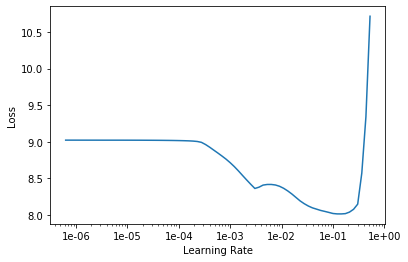

In [8]:
learn_lm.lr_find()
learn_lm.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,5.890254,5.208605,0.184375,00:13
1,4.353618,3.305348,0.401277,00:13
2,2.662218,1.986186,0.630821,00:13
3,1.862162,1.576421,0.696634,00:13
4,1.675938,1.759994,0.641054,00:13
5,4.262955,5.667517,0.159196,00:13
6,4.830745,4.265409,0.263223,00:13
7,4.032325,3.320988,0.382991,00:13
8,3.324745,2.808330,0.470286,00:13
9,2.921002,2.505059,0.525072,00:13


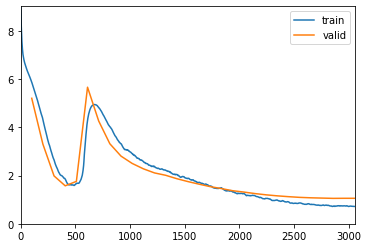

Better model found at epoch 0 with accuracy value: 0.18437501788139343.
Better model found at epoch 1 with accuracy value: 0.4012768268585205.
Better model found at epoch 2 with accuracy value: 0.6308214664459229.
Better model found at epoch 3 with accuracy value: 0.6966339945793152.
Better model found at epoch 17 with accuracy value: 0.7083929181098938.
Better model found at epoch 18 with accuracy value: 0.726348340511322.
Better model found at epoch 19 with accuracy value: 0.7358570694923401.
Better model found at epoch 20 with accuracy value: 0.7507766485214233.
Better model found at epoch 21 with accuracy value: 0.7603660821914673.
Better model found at epoch 22 with accuracy value: 0.770107090473175.
Better model found at epoch 23 with accuracy value: 0.7777767777442932.
Better model found at epoch 24 with accuracy value: 0.7829910516738892.
Better model found at epoch 25 with accuracy value: 0.7892946600914001.
Better model found at epoch 26 with accuracy value: 0.791214287281036

In [9]:
max_lr = 2e-2
learn_lm.fit_one_cycle(30, max_lr=max_lr, moms=(0.8,0.7), callbacks=[callbacks.SaveModelCallback(learn_lm, every='improvement', monitor='accuracy', name='learn_lm_PT_npt')])

In [10]:
#Carrego a melhor versão do language model
learn_lm.load('learn_lm_PT_npt')
learn_lm.save_encoder('enc_PT_npt')

In [11]:
data_clas = TextClasDataBunch.from_df('.',train_df=df_train,
                                      valid_df=df_valid,text_cols='indicacao',
                                      label_cols='ATC_1',vocab=data_lm.vocab)
data_clas.save('data_clas')

In [12]:
data_clas.show_batch()

text,target
"xxbos a simeticona é indicada para o alívio dos sintomas no caso de excesso de gases no aparelho gastrintestinal constituindo motivo de dores ou cólicas intestinais1 , tais como - xxmaj meteorismo1 - xxmaj eructação1 - xxmaj borborigmos1 - xxmaj aerofagia pós - cirúrgica1 - xxmaj distensão abdominal1 - xxmaj flatulência1 xxmaj sabendo que os gases no trato digestivo atrapalham os exames abdominais de imagem e a simeticona facilita a",A
"xxbos xxmaj neo xxmaj gentamicin xxmaj solução xxmaj injetável é indicado para o tratamento de infecções causadas por cepas de bactérias sensíveis dos seguintes microorganismos xxmaj pseudomonas aeruginosa , xxmaj proteus sp . indol - positivo e indol - negativo , xxmaj escherichia coli , xxmaj klebsiella - xxmaj enterobacter - xxmaj serratia sp . , xxmaj citrobacter sp . , xxmaj providencia sp . , xxmaj staphylococcus sp .",J
"xxbos xxmaj tratamento xxmaj neo xxmaj doxicilinr cloridrato de doxiciclina é indicado no tratamento das seguintes infecções xxmaj febre das xxmaj montanhas xxmaj rochosas , febre tifoide e do grupo tifoide , febre q , varíola por riquétsia e febre do carrapato causada por xxmaj rickettsia xxmaj infecção respiratória causada por xxmaj mycoplasma pneumoniae xxmaj psitacose causada por xxmaj chlamydia psittaci xxmaj linfogranuloma venéreo causado por xxmaj chlamydia trachomatis xxmaj",J
"xxbos xxmaj tratamento xxmaj neo xxmaj doxicilinr cloridrato de doxiciclina é indicado no tratamento das seguintes infecções xxmaj febre das xxmaj montanhas xxmaj rochosas , febre tifoide e do grupo tifoide , febre q , varíola por riquétsia e febre do carrapato causada por xxmaj rickettsia xxmaj infecção respiratória causada por xxmaj mycoplasma pneumoniae xxmaj psitacose causada por xxmaj chlamydia psittaci xxmaj linfogranuloma venéreo causado por xxmaj chlamydia trachomatis xxmaj",J
"xxbos xxmaj tratamento o cloridrato de doxiciclina é indicado no tratamento das seguintes infecções xxmaj febre das xxmaj montanhas xxmaj rochosas , febre tifoide e do grupo tifoide xxmaj febre q , xxunk e febre do carrapato causada por xxmaj rickettsia xxmaj infecção respiratória causada por xxmaj mycoplasma pneumoniae xxmaj psitacose causada por xxmaj chlamydia psittaci xxmaj linfogranuloma venéreo causado por xxmaj chlamydia trachomatis xxmaj uretrite não complicada , xxunk",J


In [13]:
learn_clas = text_classifier_learner(data_clas, AWD_LSTM, 
                                     drop_mult=0.3, 
                                     callback_fns=ShowGraph, pretrained=False)
learn_clas.load_encoder('enc_PT_npt')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (4827 items)
x: TextList
xxbos xxmaj este pomada é indicada para o alívio das manifestações inflamatórias de dermatoses sensíveis aos corticosteroides complicadas por infecção secundária causada por bactérias sensíveis à gentamicina , ou quando houver suspeita de tais infecções . xxmaj estas dermatoses incluem psoríase , dermatite alérgica de contato eczema , dermatite atópica , neurodermatite circunscrita líquen simples crônico , líquen plano , intertrigo eritematoso , desidrose pompholyx , dermatite seborreica , dermatite esfoliativa , dermatite solar , dermatite de estase e prurido anogenital .,xxbos xxmaj xxunk - xxup xxunk é indicado no tratamento de episódios hemorrágicos e na manutenção de níveis plasmáticos de fator xxup ix , em pacientes xxunk com hemofilia xxup b.,xxbos xxmaj hipertensão captopril é indicado para o tratamento da hipertensão , por reduzir a pressão arterial nesses casos . xxmaj insuficiência xxmaj cardíaca c

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


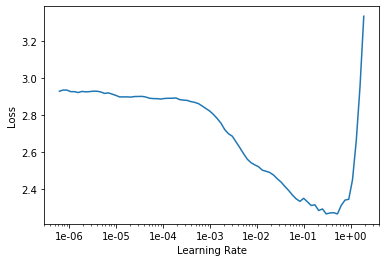

In [14]:
learn_clas.lr_find()
learn_clas.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,1.595962,0.952760,0.779619,00:07
1,1.082129,0.698898,0.809445,00:08
2,0.852166,0.612657,0.849213,00:08
3,0.707613,0.584103,0.837614,00:08
4,0.667412,0.562224,0.848384,00:07
5,0.592865,0.502671,0.864954,00:07
6,0.600545,0.511424,0.862469,00:08
7,0.583923,0.517264,0.872411,00:08
8,0.609212,0.525566,0.874068,00:08
9,0.557469,0.645463,0.855012,00:08


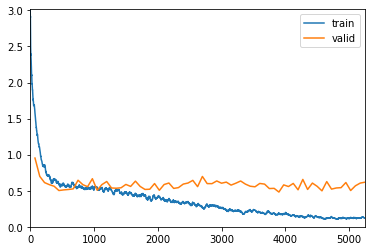

Better model found at epoch 0 with accuracy value: 0.7796189188957214.
Better model found at epoch 1 with accuracy value: 0.8094449043273926.
Better model found at epoch 2 with accuracy value: 0.8492129445075989.
Better model found at epoch 5 with accuracy value: 0.86495441198349.
Better model found at epoch 7 with accuracy value: 0.8724109530448914.
Better model found at epoch 8 with accuracy value: 0.8740679621696472.
Better model found at epoch 24 with accuracy value: 0.8898094296455383.
Better model found at epoch 28 with accuracy value: 0.8947804570198059.
Better model found at epoch 38 with accuracy value: 0.8956089615821838.
Better model found at epoch 39 with accuracy value: 0.8964374661445618.
Better model found at epoch 46 with accuracy value: 0.8997514247894287.
Better model found at epoch 51 with accuracy value: 0.9088649749755859.
Better model found at epoch 55 with accuracy value: 0.9105219841003418.


In [15]:
max_lr = 3e-2
learn_clas.fit_one_cycle(70, max_lr=max_lr , moms=(0.8,0.7), callbacks=[callbacks.SaveModelCallback(learn_clas, every='improvement', monitor='accuracy', name='learn_clas_PT_npt')])

In [16]:
learn_clas.load('learn_clas_PT_npt')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (4827 items)
x: TextList
xxbos xxmaj este pomada é indicada para o alívio das manifestações inflamatórias de dermatoses sensíveis aos corticosteroides complicadas por infecção secundária causada por bactérias sensíveis à gentamicina , ou quando houver suspeita de tais infecções . xxmaj estas dermatoses incluem psoríase , dermatite alérgica de contato eczema , dermatite atópica , neurodermatite circunscrita líquen simples crônico , líquen plano , intertrigo eritematoso , desidrose pompholyx , dermatite seborreica , dermatite esfoliativa , dermatite solar , dermatite de estase e prurido anogenital .,xxbos xxmaj xxunk - xxup xxunk é indicado no tratamento de episódios hemorrágicos e na manutenção de níveis plasmáticos de fator xxup ix , em pacientes xxunk com hemofilia xxup b.,xxbos xxmaj hipertensão captopril é indicado para o tratamento da hipertensão , por reduzir a pressão arterial nesses casos . xxmaj insuficiência xxmaj cardíaca c

In [17]:
interp = ClassificationInterpretation.from_learner(learn_clas)

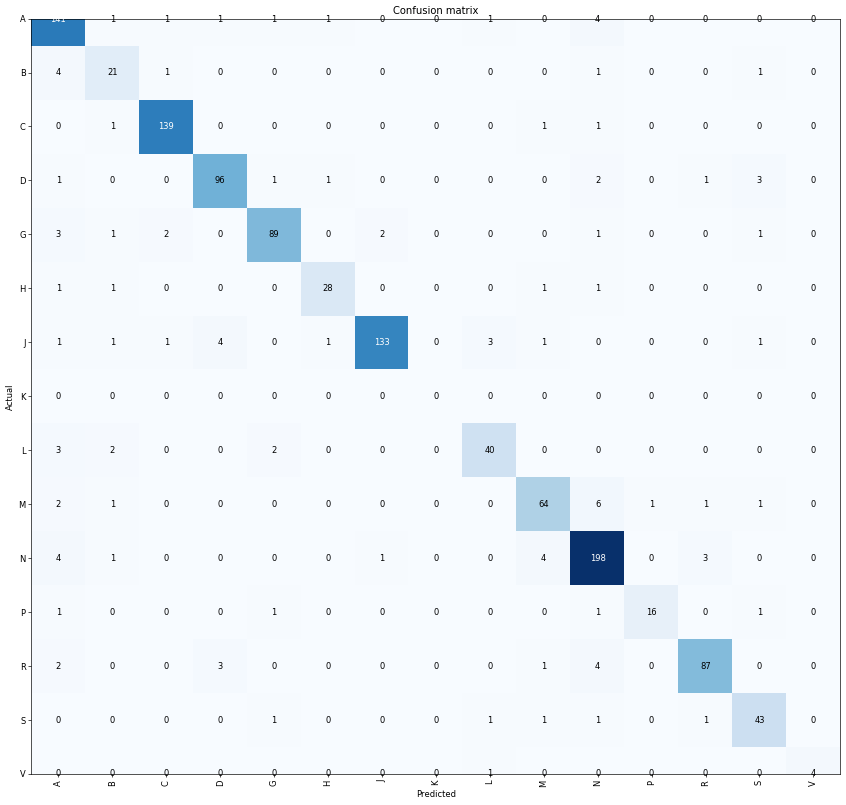

In [18]:
interp.plot_confusion_matrix(figsize=(14,14), dpi=60)